# Name: Divya Pardeshi
# Assignment: Task 1 Web Scraping To Gain Company Insights

## PROBLEM STATEMENT: 
Scrape and analyse customer review data to uncover findings for British Airways

In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from bs4 import BeautifulSoup
import re
import requests 
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## PART 1: WEB SCRAPPING

In [2]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []


#### Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 200
data_string = ""
for i in range(1, pages+1):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=200")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
     
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 15
Error on page 16
Error on page 16
Error on page 17
Error on page 17


In [4]:
#check the length of total reviews extracted
len(reviews)

3471

In [5]:
len(country)

3471

In [6]:
#check the length of Ratings
stars = stars[:3471]
stars

['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '9',
 '10',
 '10',
 '10',
 '2',
 '4',
 '3',
 '9',
 '9',
 '9',
 '2',
 '3',
 '2',
 '9',
 '9',
 '1',
 '3',
 '4',
 '5',
 '1',
 '1',
 '2',
 '8',
 '6',
 '4',
 '4',
 '3',
 '1',
 '1',
 '8',
 '3',
 '1',
 '1',
 '2',
 '2',
 '5',
 '6',
 '1',
 '8',
 '3',
 '6',
 '3',
 '4',
 '3',
 '1',
 '9',
 '2',
 '7',
 '7',
 '1',
 '4',
 '1',
 '2',
 '1',
 '5',
 '1',
 '1',
 '1',
 '6',
 '1',
 '9',
 '9',
 '3',
 '9',
 '2',
 '8',
 '1',
 '3',
 '7',
 '8',
 '9',
 '1',
 '10',
 '3',
 '6',
 '7',
 '8',
 '3',
 '9',
 '1',
 '10',
 '10',
 '4',
 '5',
 '1',
 '2',
 '2',
 '7',
 '1',
 '4',
 '1',
 '10',
 '9',
 '1',
 '1',
 '1',
 '10',
 '10',
 '1',
 '8',
 '1',
 '1',
 '2',
 '2',
 '8',
 '1',
 '1',
 '1',
 '5',
 '5',
 '7',
 '1',
 '10',
 '8',
 '1',
 '2',
 '1',
 '4',
 '1',
 '6',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '1',
 '4',
 '5',
 '1',
 '1',
 '4',
 '8',
 '2',
 '5',
 '4',
 '1',
 '10',
 '10',
 '10',
 '9',
 '9',
 '1',
 '8',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '3',
 '2',
 '4',
 '8',

In [7]:
#create a dataframe from these collected lists of data
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [8]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom


In [9]:
df.shape

(3471, 4)

#### Export the data into csv format

In [10]:
df.to_csv('ba_reviews.csv', encoding = 'utf-8')

import os
os.getcwd()

'C:\\Users\\swati'

## PART 2: DATA CLEANING

In [11]:
#Again loading the file for data cleaning purpose
df = pd.read_csv("ba_reviews.csv")

In [12]:
df.head()

,Unnamed: 0,reviews,stars,date,country
0,0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom
1,1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain
2,2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom
3,3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom
4,4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom


In [13]:
df = df.drop(columns='Unnamed: 0')   #Unnamed: 0 does not provide any significance in our analysis so dropping it

In [14]:
df.dropna(axis = 0,inplace=True)  #dropping all the nan values

In [15]:
df.tail(10)

,reviews,stars,date,country
3461,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,2,29th August 2012,United Kingdom
3462,LHR-JFK-LAX-LHR. Check in was ok apart from be...,2,29th August 2012,United Kingdom
3463,Just got back from Bridgetown Barbados flying ...,1,29th August 2012,United Kingdom
3464,HKG-LHR in New Club World on Boeing 777-300 - ...,7,29th August 2012,United Kingdom
3465,YYZ to LHR - July 2012 - I flew overnight in p...,5,29th August 2012,Canada
3466,Flew return in CW from LHR to BKK in August 20...,8,29th August 2012,Ireland
3467,LHR to HAM. Purser addresses all club passenge...,6,28th August 2012,United Kingdom
3468,My son who had worked for British Airways urge...,7,12th October 2011,United Kingdom
3469,London City-New York JFK via Shannon on A318 b...,10,11th October 2011,United States
3470,SIN-LHR BA12 B747-436 First Class. Old aircraf...,10,9th October 2011,United Kingdom


In [16]:
df.reviews= df.reviews.str.split('|',expand=True)[1] 

In [17]:
df.head()

,reviews,stars,date,country
0,BA 242 on the 6/2/23. Boarding was delayed du...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom
1,"Not only my first flight in 17 years, but al...",9,6th February 2023,Spain
2,My husband and myself were flying to Madrid ...,10,4th February 2023,United Kingdom
3,Organised boarding process. Really friendly c...,10,31st January 2023,United Kingdom
4,Outward journey BA245 London to Buenos Aires...,10,31st January 2023,United Kingdom


In [18]:
reviews_data = df.reviews
reviews_data

0        BA 242 on the 6/2/23. Boarding was delayed du...
1         Not only my first flight in 17 years, but al...
2         My husband and myself were flying to Madrid ...
3        Organised boarding process. Really friendly c...
4         Outward journey BA245 London to Buenos Aires...
                              ...                        
3466                                                 None
3467                                                 None
3468                                                 None
3469                                                 None
3470                                                 None
Name: reviews, Length: 3469, dtype: object

In [19]:
lemma = WordNetLemmatizer()
#create an empty list to collect cleaned data review
review =[]

#loop through each review, remove punctuations, small case it, join it and add it to review
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', str(rev))
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    review.append(str(rev))

In [20]:
# add the Review to the original dataframe
df['Review'] = review

In [21]:
df.head()

,reviews,stars,date,country,Review
0,BA 242 on the 6/2/23. Boarding was delayed du...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom,ba boarding delayed due late arrival incoming ...
1,"Not only my first flight in 17 years, but al...",9,6th February 2023,Spain,first flight year also first time back england...
2,My husband and myself were flying to Madrid ...,10,4th February 2023,United Kingdom,husband flying madrid rd february legal matter...
3,Organised boarding process. Really friendly c...,10,31st January 2023,United Kingdom,organised boarding process really friendly cre...
4,Outward journey BA245 London to Buenos Aires...,10,31st January 2023,United Kingdom,outward journey ba london buenos aire club wor...


In [22]:
df.dtypes

reviews    object
stars      object
date       object
country    object
Review     object
dtype: object

In [23]:
# convert the date to datetime format
df.date = pd.to_datetime(df.date)
df.date.head()

0   2023-02-07
1   2023-02-06
2   2023-02-04
3   2023-01-31
4   2023-01-31
Name: date, dtype: datetime64[ns]

#### Check for null Values

In [24]:
df.isna().sum()

reviews    1521
stars         0
date          0
country       0
Review        0
dtype: int64

In [25]:
df.drop("reviews", axis= 1, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3469 entries, 0 to 3470
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   stars    3469 non-null   object        
 1   date     3469 non-null   datetime64[ns]
 2   country  3469 non-null   object        
 3   Review   3469 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 135.5+ KB


In [27]:
#Cleaning stars column
df['stars'].unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '9', '10', '2', '4', '3', '1',
       '5', '8', '6', '7', 'None'], dtype=object)

In [28]:
#removing \n and \t from ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [29]:
df['stars'].value_counts()

1       749
2       392
3       386
8       354
10      315
9       304
7       304
5       243
4       232
6       185
None      5
Name: stars, dtype: int64

In [30]:
#dropping the row where the value of stars is None

df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [31]:
#resetting the index
df.reset_index(drop=True)

,stars,date,country,Review
0,5,2023-02-07,United Kingdom,ba boarding delayed due late arrival incoming ...
1,9,2023-02-06,Spain,first flight year also first time back england...
2,10,2023-02-04,United Kingdom,husband flying madrid rd february legal matter...
3,10,2023-01-31,United Kingdom,organised boarding process really friendly cre...
4,10,2023-01-31,United Kingdom,outward journey ba london buenos aire club wor...
...,...,...,...,...
3459,8,2012-08-29,Ireland,none
3460,6,2012-08-28,United Kingdom,none
3461,7,2011-10-12,United Kingdom,none
3462,10,2011-10-11,United States,none


#### Export data again to csv file for saving our cleaned data

In [32]:
df.to_csv('ba_cleanedreviews.csv', encoding = 'utf-8')

import os
os.getcwd()

'C:\\Users\\swati'

#### Loading the file again

In [33]:
df = pd.read_csv(r'C:\Users\swati\ba_cleanedreviews.csv')
df

,Unnamed: 0,stars,date,country,Review
0,0,5,2023-02-07,United Kingdom,ba boarding delayed due late arrival incoming ...
1,1,9,2023-02-06,Spain,first flight year also first time back england...
2,2,10,2023-02-04,United Kingdom,husband flying madrid rd february legal matter...
3,3,10,2023-01-31,United Kingdom,organised boarding process really friendly cre...
4,4,10,2023-01-31,United Kingdom,outward journey ba london buenos aire club wor...
...,...,...,...,...,...
3459,3466,8,2012-08-29,Ireland,none
3460,3467,6,2012-08-28,United Kingdom,none
3461,3468,7,2011-10-12,United Kingdom,none
3462,3469,10,2011-10-11,United States,none


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3464 non-null   int64 
 1   stars       3464 non-null   int64 
 2   date        3464 non-null   object
 3   country     3464 non-null   object
 4   Review      3464 non-null   object
dtypes: int64(2), object(3)
memory usage: 135.4+ KB


## PART 3: EDA EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***1st Moment Business Decision (Measures of Central Tendency)***

1) Mean

2) Median

3) Mode

In [35]:
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

Unnamed: 0    1732.273672
stars            4.846998
dtype: float64


Unnamed: 0    1731.5
stars            4.0
dtype: float64


      Unnamed: 0  stars        date         country Review
0              0    1.0  2015-01-19  United Kingdom   none
1              1    NaN         NaN             NaN    NaN
2              2    NaN         NaN             NaN    NaN
3              3    NaN         NaN             NaN    NaN
4              4    NaN         NaN             NaN    NaN
...          ...    ...         ...             ...    ...
3459        3466    NaN         NaN             NaN    NaN
3460        3467    NaN         NaN             NaN    NaN
3461        3468    NaN         NaN             NaN    NaN
3462        3469    NaN         NaN             NaN    NaN
3463        3470    NaN         NaN             NaN    NaN

[3464 rows x 5 columns]


***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [36]:
print(df.var())
print('\n')
print(df.std())

Unnamed: 0    1.002560e+06
stars         9.971963e+00
dtype: float64


Unnamed: 0    1001.279331
stars            3.157842
dtype: float64


***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [37]:
df.skew()

Unnamed: 0    0.002987
stars         0.229655
dtype: float64

***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [38]:
df.kurt()

Unnamed: 0   -1.197503
stars        -1.406184
dtype: float64

***Descriptive Statistics and Data Distribution Function***

In [39]:
df.describe()

,Unnamed: 0,stars
count,3464.000000,3464.000000
mean,1732.273672,4.846998
std,1001.279331,3.157842
min,0.000000,1.000000
25%,865.750000,2.000000
50%,1731.500000,4.000000
75%,2597.250000,8.000000
max,3470.000000,10.000000


## Data Preprocessing

In [40]:
df.dtypes

Unnamed: 0     int64
stars          int64
date          object
country       object
Review        object
dtype: object

In [41]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
3459    False
3460    False
3461    False
3462    False
3463    False
Length: 3464, dtype: bool


0

In [42]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed.

**Missing Value Analysis**

***IMPUTATION:***

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [43]:
df.isna().sum() # Check for missing values

Unnamed: 0    0
stars         0
date          0
country       0
Review        0
dtype: int64

In [44]:
df.drop("Unnamed: 0", axis= 1, inplace = True)

### Outliers Analysis:

Exceptional data values in a variable can be outliers. In case of outliers we can use one of the strategies of 3 R (Rectify, Retain, or Remove)

**Box Plot**

Visualize numeric data using boxplot for outliers

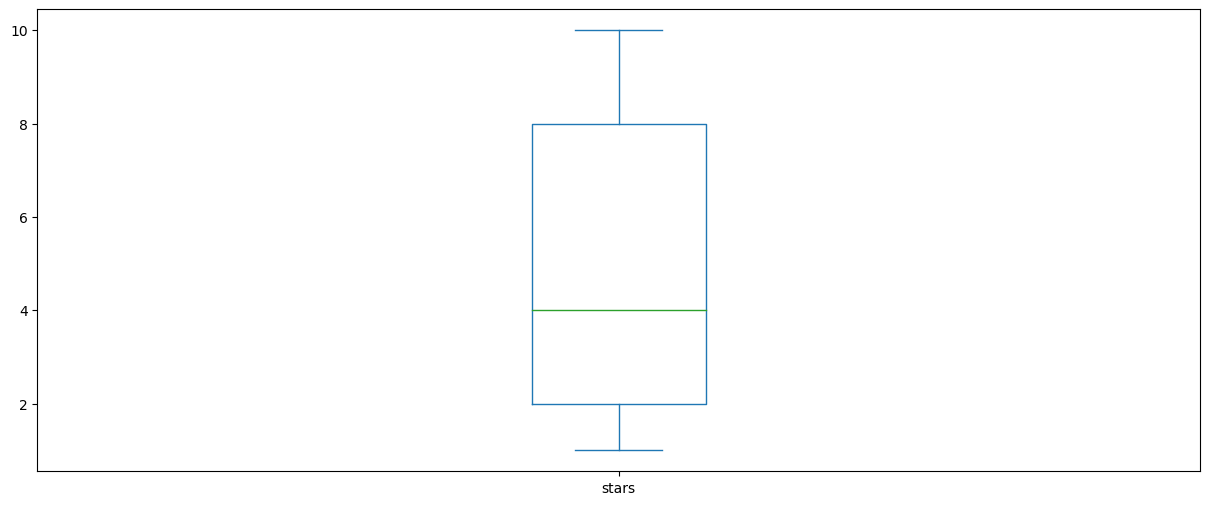

In [45]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 6)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 2.5) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

#### **Observation**:

- The column 'stars' has no outliers, so we can proceed with our analysis

In [46]:
## Typecasting
df['stars'] = df['stars'].astype('int')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3464 entries, 0 to 3463
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    3464 non-null   int32 
 1   date     3464 non-null   object
 2   country  3464 non-null   object
 3   Review   3464 non-null   object
dtypes: int32(1), object(3)
memory usage: 121.8+ KB


## **Graphical Representation**

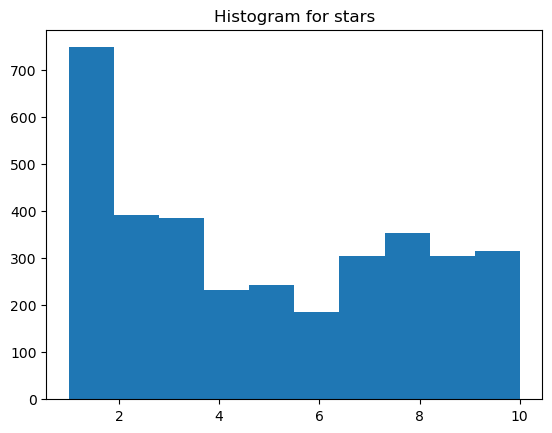

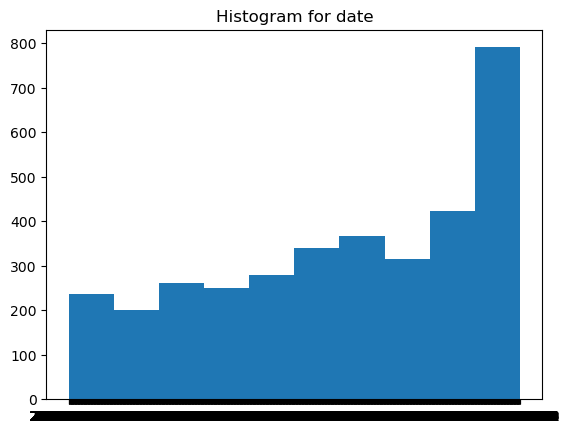

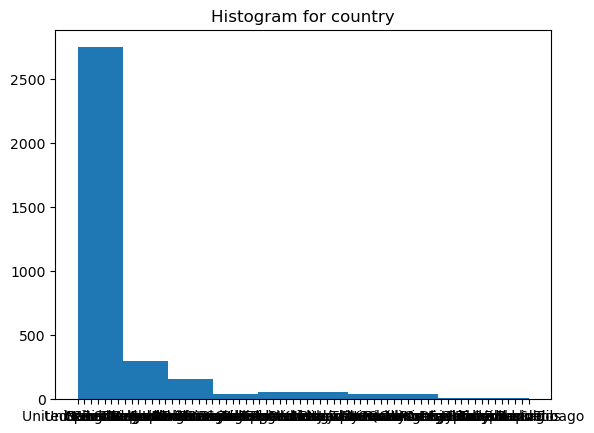

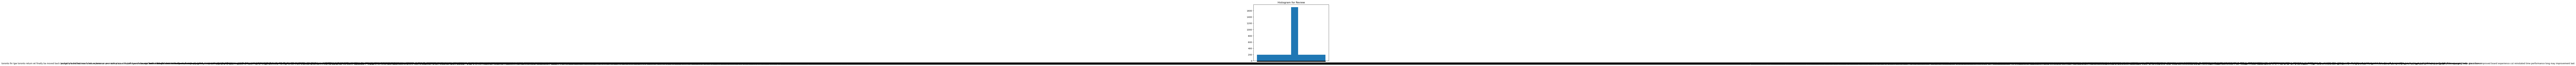

In [48]:
# Histogram describes the spread of data
for i in df.columns:
  plt.hist(x = df[i])
  plt.title("Histogram for " + str(i))
  plt.show()

In [49]:
# star
df['stars'].value_counts()

1     749
2     392
3     386
8     354
10    315
9     304
7     304
5     243
4     232
6     185
Name: stars, dtype: int64

In [50]:
# checking the number of sum of null values in the columns
df.isna().sum(axis=0)

stars      0
date       0
country    0
Review     0
dtype: int64

In [51]:
# plotting the complaint types
df['country'].value_counts()

United Kingdom       2209
United States         361
Australia             149
Canada                106
Germany                59
                     ... 
Vietnam                 1
Jordan                  1
Ukraine                 1
Trinidad & Tobago       1
Barbados                1
Name: country, Length: 68, dtype: int64

<AxesSubplot:title={'center':'Country'}, ylabel='Count'>

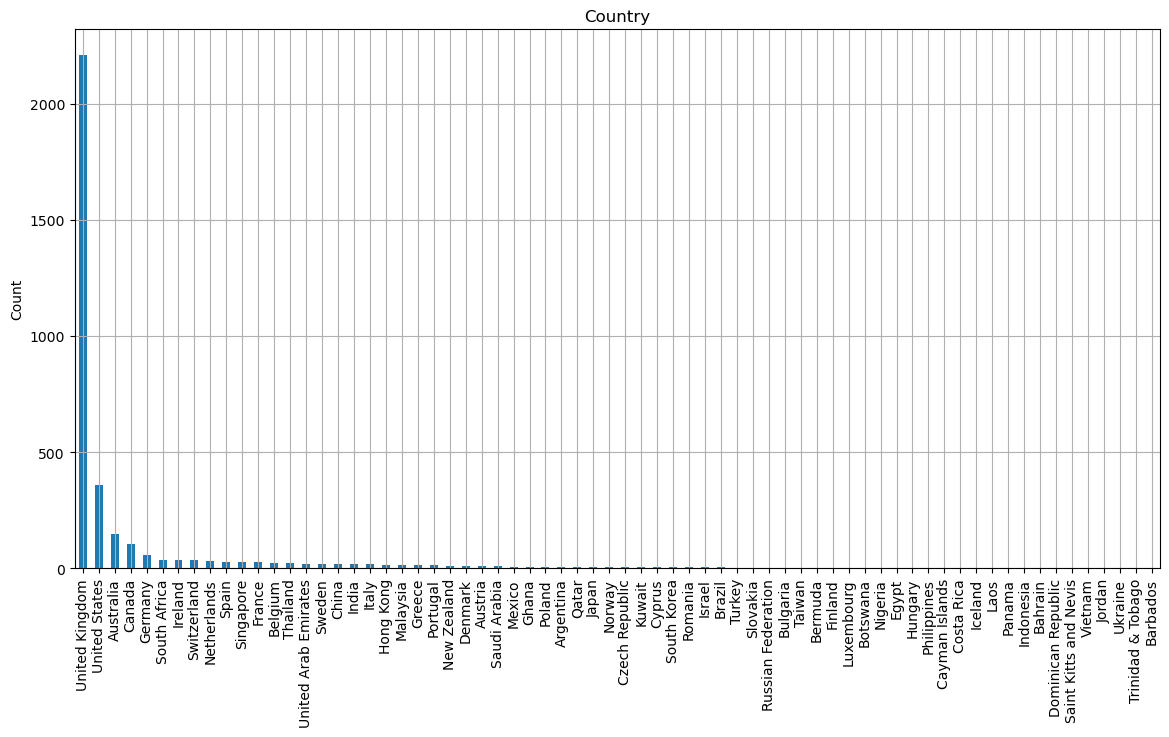

In [52]:
df['country'].value_counts().plot(kind = 'bar', figsize=(14, 7), title='Country', ylabel='Count', grid=True)

#### **Observation**:
Maximum number of reviews came from United Kingdom followed by United States, Australia, Canada and so on.
Least number of reviews comes from Iceland

In [53]:
# Top Countries
top_10_country = df['country'].value_counts()[:10].keys()
top_10_country

Index(['United Kingdom', 'United States', 'Australia', 'Canada', 'Germany',
       'South Africa', 'Ireland', 'Switzerland', 'Netherlands', 'Spain'],
      dtype='object')

###  What is the average overall rating given for British Airways?


In [54]:
df.stars.mean()

4.846997690531178

#### **Observation**:
Overall rating is 4.849307159353349

### What is the total counts for each ratings?


Text(0.5, 0.98, 'Counts for each ratings')

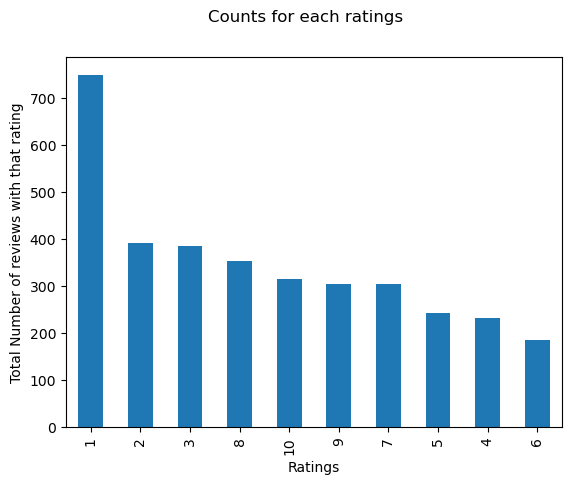

In [55]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

### Which country most review comes from?


In [56]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [57]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

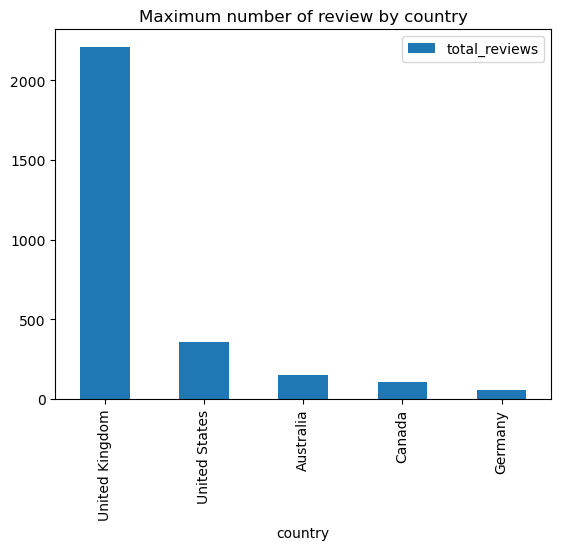

In [58]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

#### **Observation**:
Top 5 countries from where maximum reviews comes are United Kingdom, United States, Australia, Canada and Germany.

### Which country provided on average highest ratings?

In [59]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [60]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 10 Countries with avg highest rating provided to British Airways')

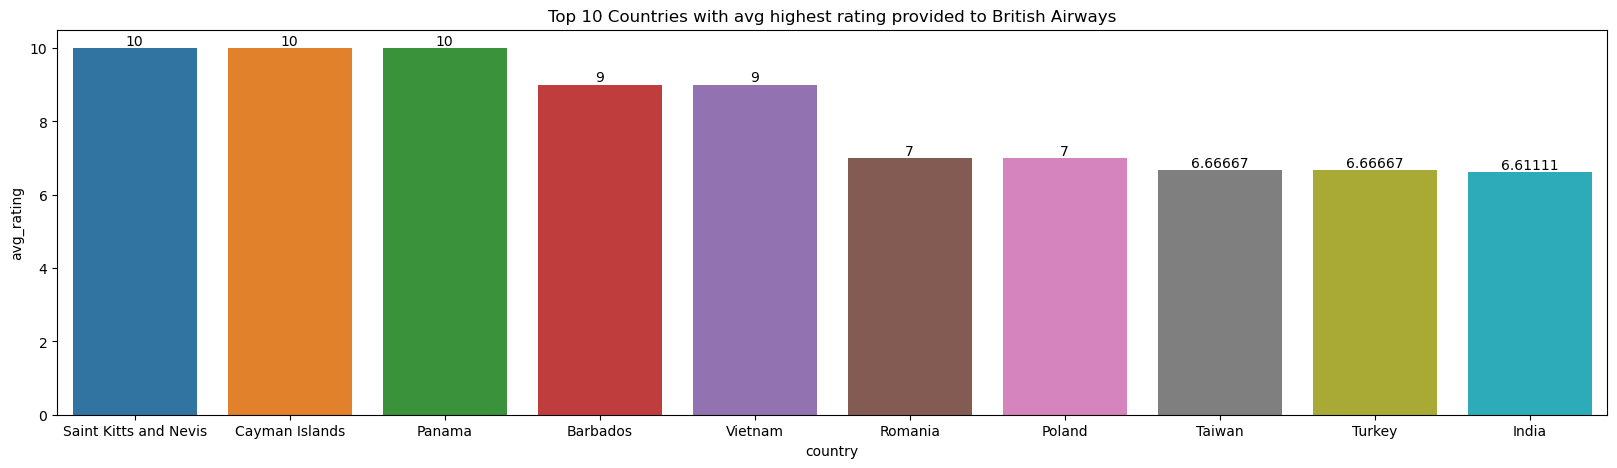

In [61]:
fig, ax = plt.subplots(figsize=(20,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 Countries with avg highest rating provided to British Airways")

## Part 4: SENTIMENT ANALYSIS

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [63]:
# Joinining all the reviews into single paragraph 
rev_string = " ".join(df.Review)

In [64]:
rev_words = [rev_string]

In [65]:
 #TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True, ngram_range = (1, 1))
X = vectorizer.fit_transform(rev_words)


with open("C:\\Users\\swati\\Downloads\\stop.txt", "r") as sw:
    stop_words = sw.read()

stop_words = stop_words.split("\n")
#adding stopwords to remove most commonly occuring words
stop_words.extend(["flight", "ba", "none", "british airway"])
#adding more stopwords so that frequently used words are removed

In [66]:
flight_reviews_words = [w for w in rev_words if not w in stop_words]

In [67]:
# Joinining all the reviews into single paragraph 
rev_string = " ".join(flight_reviews_words)
rev_string

'ba boarding delayed due late arrival incoming flight communication ground staff excellent keep u informed flight service excellent crew friendly excellent service overall happy ba first flight year also first time back england year flew pmi lgw returned wizz air easyjet offered inconvenient flight time charged flight worth baggage british airway convenient best value option available offered ideal flight time charge per flight baggage reasonable total cost flight regular update information via email seamless online seat allocation check efficient staff check desk pmi lgw ensured long queue dealt quickly humanly possible immaculate aircraft comfortable leather seat adequate legroom tall cabin crew polite friendly professional flight food drink good quality reasonably priced enjoyed meat ploughman ipa beer total flight flown time last year different airline various propeller jet aircraft well one lgw lhr helicopter transfer flying totally different experience back day age budget airline

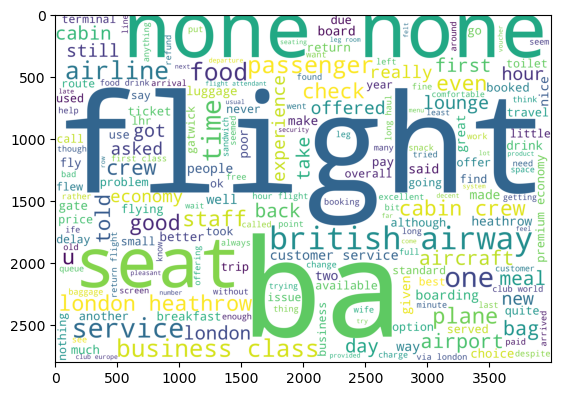

In [68]:
from wordcloud import WordCloud
# WordCloud can be performed on the string inputs.
# We create WordCloud create for our Reviews column to understand which words are used frequently
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=4000,
                      height=2800
                     ).generate(rev_string)

plt.imshow(wordcloud_ip)

#### **Observation**:
There are many words that does not set the idea of whether the review is positive or negative. For example words like "ba", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

In [69]:
from PIL import Image 
from wordcloud import ImageColorGenerator
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger"\
                 "london", "heathrow", "aircraft", "could","even", "would","none","day","get"])
#adding more stopwords so that frequently used words are filtered out from our analysis

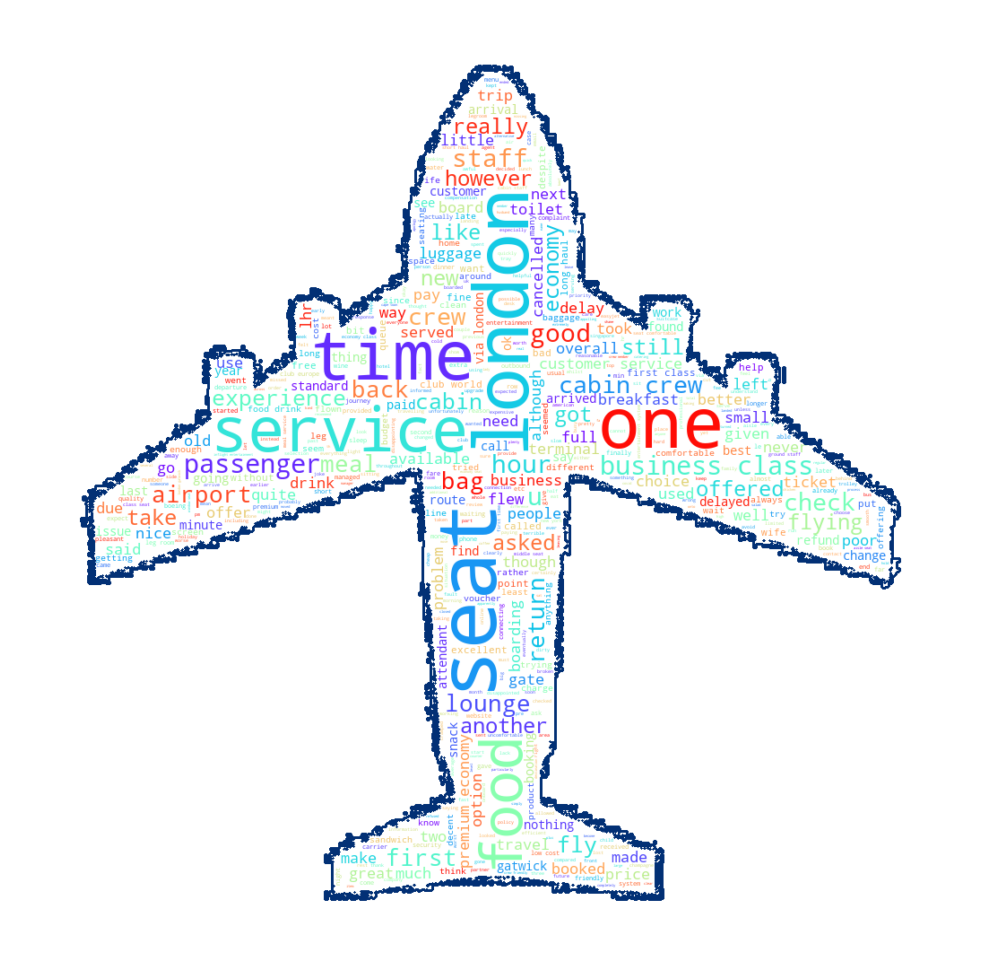

In [70]:
mask = np.array(Image.open("D:/flightt.jpg"))
wordcloud = WordCloud(stopwords = stopwords,width = 4000, height = 2800, mask = mask,background_color = 'white',max_words=500, contour_color='#023075',contour_width=2,colormap='rainbow').generate(rev_string)
plt.figure(figsize = (10,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Word Frequency


In [71]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = rev_string.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

#adding stopwords so that frequently used words are removed
new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'hour'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'good'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'meal'),
  Text(14, 0, 'drink'),
  Text(15, 0, 'customer'),
  Text(16, 0, 'boarding'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'bag'),
  Text(19, 0, 'experience')])

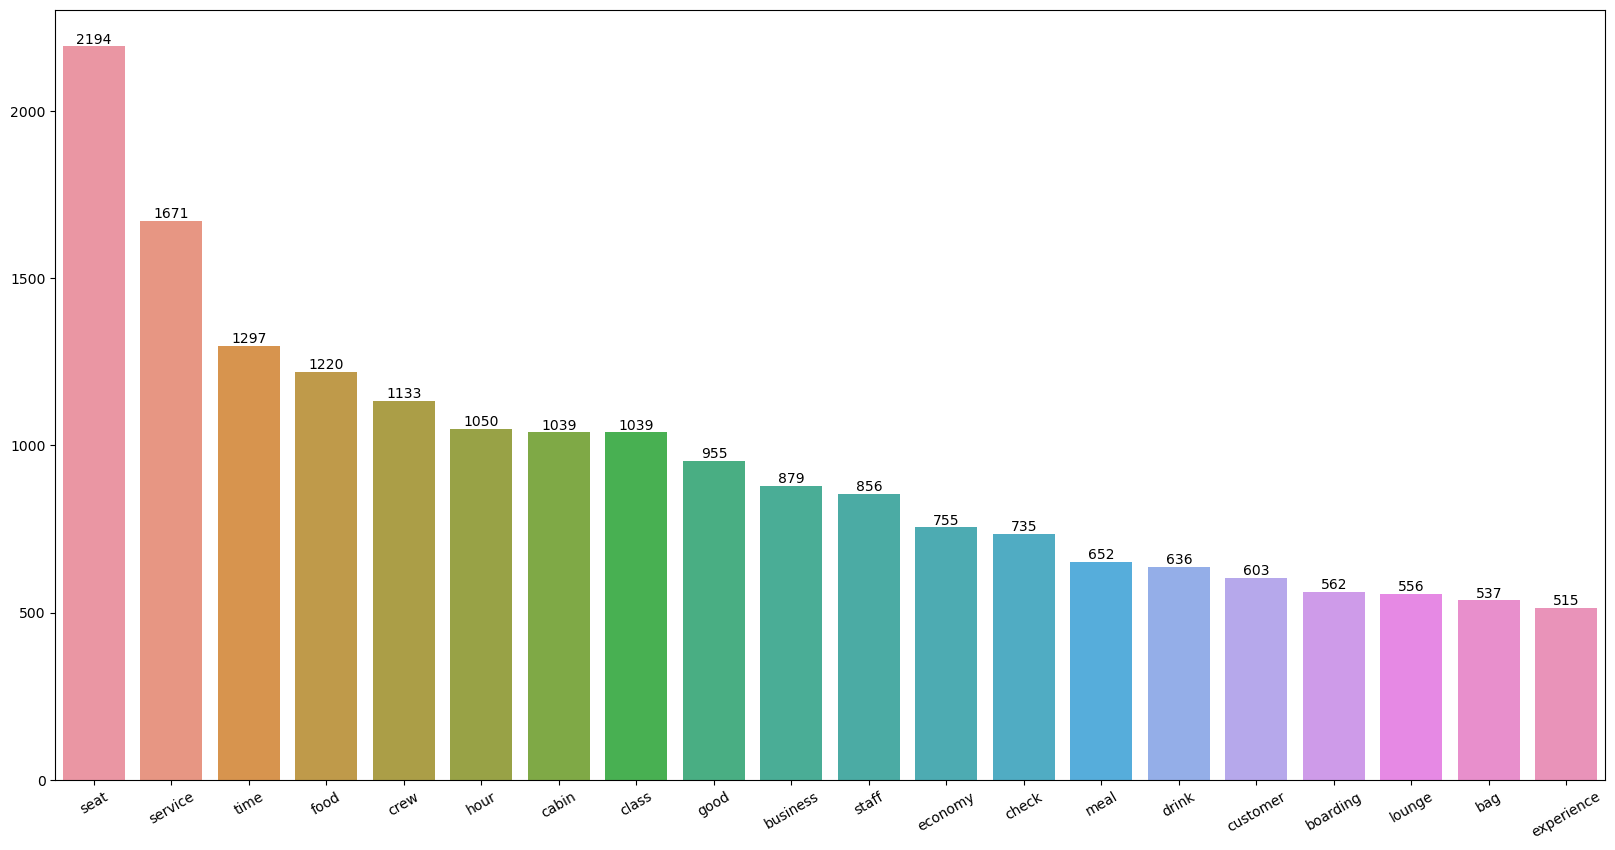

In [72]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

#### **Observation**:
We can clearly see from the above graph that what customers are really talking about. We see that Seat is most talked about the airline followed by "Service", "time" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

## Word Frequency with N-gram


<AxesSubplot:>

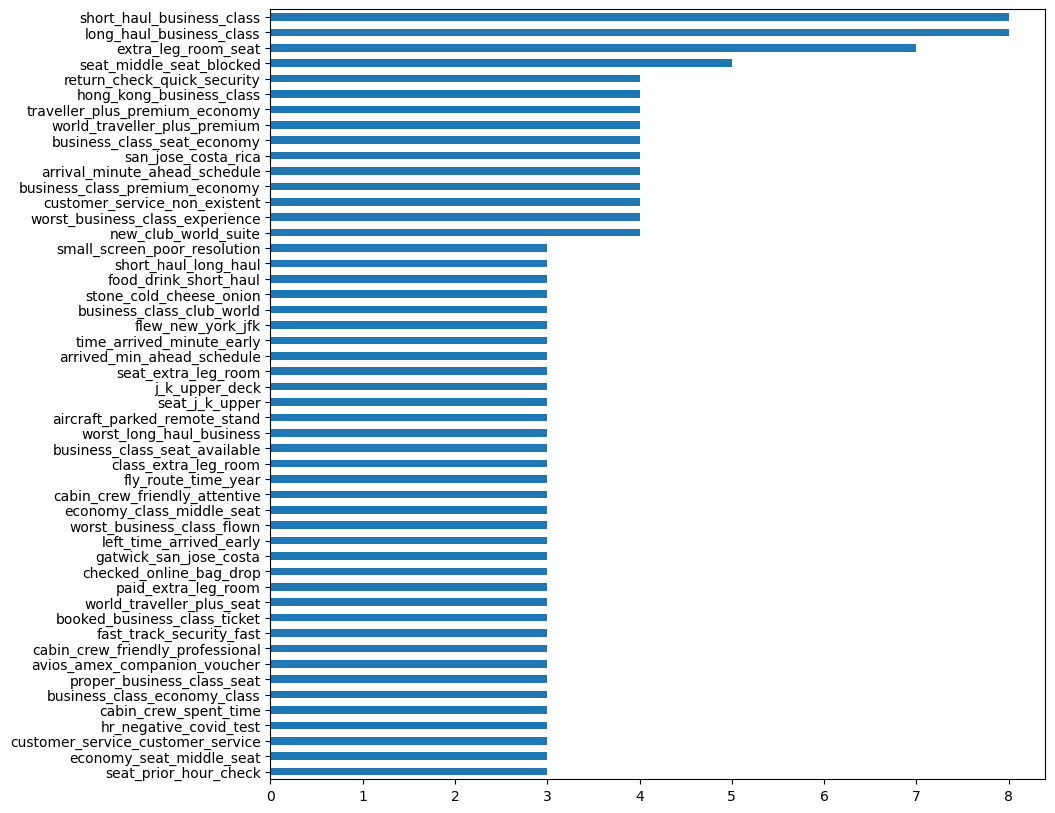

In [73]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.Review)

#split the text of all reviews into a list of words
words = rev_string.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(50)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

#### **Observation**:
We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

### Sentiment Analysis using VADER


In [74]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swati\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [75]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(Review):
    return sentiment_analyzer.polarity_scores(Review)['compound']

def get_sentiment_class(Review):
    compound = sentiment_analyzer.polarity_scores(Review)['compound']
    result = ''
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [76]:
df['sentiment_score'] = df['Review'].apply(get_sentiment_score)

In [77]:
df['sentiment'] = df['Review'].apply(get_sentiment_class)

In [78]:
df.head()

,stars,date,country,Review,sentiment_score,sentiment
0,5,2023-02-07,United Kingdom,ba boarding delayed due late arrival incoming ...,0.9524,Positive
1,9,2023-02-06,Spain,first flight year also first time back england...,0.9840,Positive
2,10,2023-02-04,United Kingdom,husband flying madrid rd february legal matter...,0.9878,Positive
3,10,2023-01-31,United Kingdom,organised boarding process really friendly cre...,0.9371,Positive
4,10,2023-01-31,United Kingdom,outward journey ba london buenos aire club wor...,-0.2500,Negative


#### Visual Representation


<AxesSubplot:xlabel='sentiment', ylabel='count'>

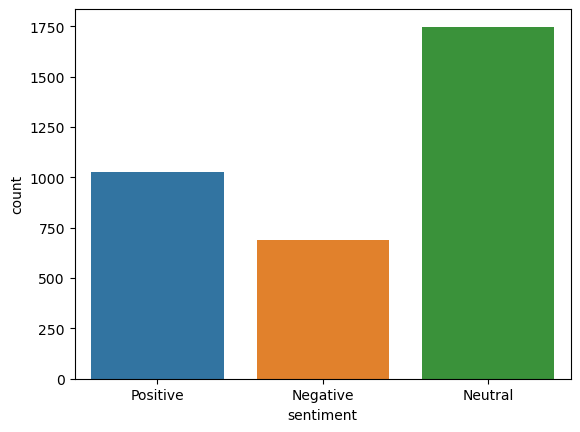

In [79]:
sns.countplot(x=df["sentiment"])

<AxesSubplot:ylabel='sentiment'>

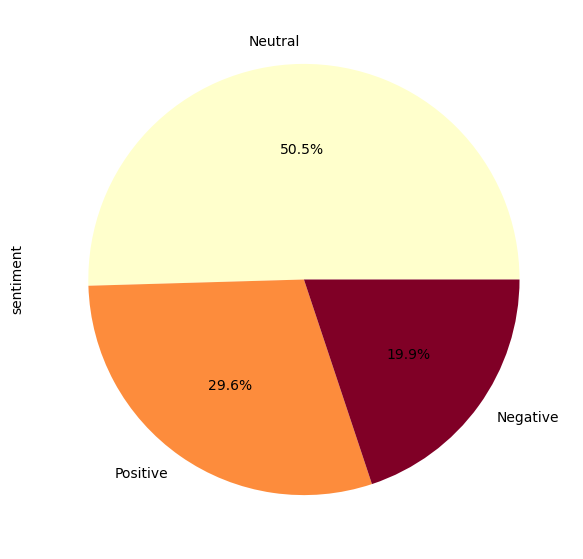

In [80]:
figure = plt.figure(figsize=[7, 7])

(df['sentiment'].value_counts().plot(kind = 'pie',autopct='%3.1f%%',cmap = 'YlOrRd'))